In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
states = gpd.read_file("./cb_2018_us_state_500k/cb_2018_us_state_500k.shp") # Path to the shapefile
print(states["NAME"]) # print out state names

0                                      Mississippi
1                                   North Carolina
2                                         Oklahoma
3                                         Virginia
4                                    West Virginia
5                                        Louisiana
6                                         Michigan
7                                    Massachusetts
8                                            Idaho
9                                          Florida
10                                        Nebraska
11                                      Washington
12                                      New Mexico
13                                     Puerto Rico
14                                    South Dakota
15                                           Texas
16                                      California
17                                         Alabama
18                                         Georgia
19                             

In [3]:
# remove territories, etc.
remove_states = ["Puerto Rico",
                 "District of Columbia",
                 "American Samoa",
                 "United States Virgin Islands",
                 "Guam",
                 "Commonwealth of the Northern Mariana Islands",
                ]

# create new df of just states
just_states = states[~states["NAME"].isin(remove_states)].reset_index()

just_states

,index,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [4]:
# separate single and multipolygon states
single_states = ["Oklahoma",
                 "West Virginia",
                 "Idaho",
                 "Nebraska",
                 "New Mexico",
                 "South Dakota",
                 "Pennsylvania",
                 "Missouri",
                 "Colorado",
                 "Utah",
                 "Tennessee",
                 "Wyoming",
                 "Kansas",
                 "Nevada",
                 "Illinois",
                 "Vermont",
                 "Montana",
                 "Iowa",
                 "Arizona",
                 "New Jersey",
                 "North Dakota",
                 "Arkansas",
                 "Indiana"]

multi_states = ["Mississippi",
                "North Carolina",
                "Virginia",
                "Louisiana",
                "Michigan",
                "Massachusetts",
                "Florida",
                "Washington",
                "Texas",
                "California",
                "Alabama",
                "Georgia",
                "New York",
                "Alaska",
                "South Carolina",
                "New Hampshire",
                "Maryland",
                "Maine",
                "Hawaii",
                "Delaware",
                "Rhode Island",
                "Kentucky",
                "Ohio",
                "Wisconsin",
                "Oregon",
                "Minnesota",
                "Connecticut"]

# Polygon

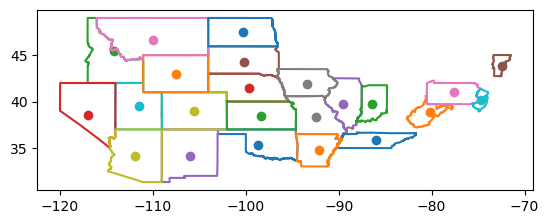

In [5]:
state_names_s = [] # lists to store data from single polygon states
state_coords_s = []
state_centroids_s = []

for s in single_states:

    curr_state=s # select current state
    curr_coords = just_states[just_states["NAME"]==curr_state].get_coordinates() # get coordinates as dataframe
    curr_coord_list = [list(curr_coords["x"]), list(curr_coords["y"])] # convert to list of lists
    
    # get centroid
    cen_x_val = (min(curr_coord_list[0])+max(curr_coord_list[0]))/2
    cen_y_val = (min(curr_coord_list[1])+max(curr_coord_list[1]))/2
    curr_centroid = [cen_x_val, cen_y_val]

    # save data
    state_names_s.append(curr_state)
    state_coords_s.append(curr_coord_list)
    state_centroids_s.append(curr_centroid)
    
    # check plot
    plt.plot(curr_coord_list[0], curr_coord_list[1])
    plt.scatter(curr_centroid[0], curr_centroid[1])
    plt.gca().set_aspect("equal")

# Multipolygon

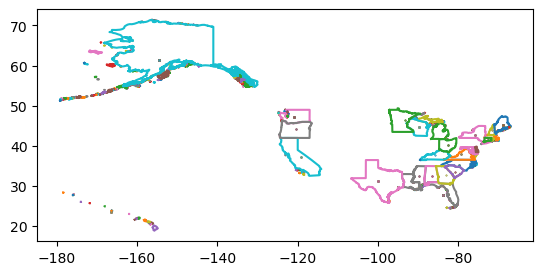

In [6]:
state_names_m = [] # lists to store data from multipolygon states
state_coords_m = []
state_centroids_m = []

for m in multi_states:

    curr_state=m # select current state
    curr_df = just_states[just_states["NAME"]==curr_state] # get coordinates as dataframe
    
    # expand polygons
    polys = (
        gpd.GeoSeries(
            curr_df.dropna()["geometry"].apply(lambda g: g.geoms).explode()
        )
        .reset_index(drop=True)
    )
    
    # get coordinates for each polygon
    curr_coords = []
    for geom in polys:
        curr_coords.append(list(geom.exterior.coords))

    if curr_state=="Alaska":
        curr_coords = curr_coords[14:]
    
    # unzip coordinates and create list of list of coordinates
    curr_coord_list = []
    for i in range(len(curr_coords)):
        unzipped_coord = list(zip(*curr_coords[i]))
        unzipped_list = [list(unzipped_coord)[0],list(unzipped_coord)[1]]
        curr_coord_list.append(unzipped_list)
    
    # calcualte the centroid of bounding box
    cen_x_vals = []
    cen_y_vals = []
    for i in range(len(curr_coord_list)):
        for j in range(len(curr_coord_list[i][0])):
            cen_x_vals.append(curr_coord_list[i][0][j])
        for k in range(len(curr_coord_list[i][1])):
            cen_y_vals.append(curr_coord_list[i][1][k])
    cen_x_val = (min(cen_x_vals)+max(cen_x_vals))/2
    cen_y_val = (min(cen_y_vals)+max(cen_y_vals))/2
    curr_centroid = [cen_x_val, cen_y_val]

    # save data
    state_names_m.append(curr_state)
    state_coords_m.append(curr_coord_list)
    state_centroids_m.append(curr_centroid)
        
    # check plot
    for i in range(len(curr_coord_list)):
        plt.plot(curr_coord_list[i][0], curr_coord_list[i][1])
        plt.scatter(curr_centroid[0], curr_centroid[1], s=0.1)
        plt.gca().set_aspect("equal")


# Area calculations

In [75]:
additional_scale = 0.8 # set additional scale factor

In [76]:
# read in data
acres = pd.read_csv("./population_map_race_2020.csv")

# remove US data for now
acres = acres.iloc[1:,:]

# get the total acres for each state
acres["total"] = acres["white"]+acres["Latino"]+acres["Indigenous"]+acres["Asian"]+acres["Black"]+acres["PacificIslander"]

# get the max acres amount
max_acres = acres["total"].max()
max_state = acres["state"][acres["total"]==max_acres].item()
max_mi2 = acres["area_mi2"][acres["state"]==max_state].item()

# set scale for each state
acres["acre_scale"] = (acres["total"]/max_acres)
acres["mi2_scale"] = (acres["area_mi2"]/max_mi2)
acres["scale"] = (acres["acre_scale"] / acres["mi2_scale"])*additional_scale

acres

,state,area_mi2,total,white,Black,Indigenous,Asian,PacificIslander,Other,Mixed,Latino,acre_scale,mi2_scale,scale
1,Alabama,52420,4825206,3171351,1288159,23119,75918,2612,14455,184618,264047,0.128035,0.320230,0.319858
2,Alaska,665384,657055,421758,20731,108838,43449,12455,4575,71761,49824,0.017435,4.064779,0.003431
3,Arizona,113990,6853051,3816547,317161,263930,248837,14323,31611,266840,2192253,0.181843,0.696356,0.208908
4,Arkansas,53179,2856320,2063550,449884,20549,51210,14280,8047,147157,256847,0.075791,0.324866,0.186640
5,California,163695,37686572,13714587,2119286,156085,5978795,138167,223929,1627722,15579652,1.000000,1.000000,0.800000
6,Colorado,104094,5483764,3760663,221310,33768,195220,9005,29560,260798,1263798,0.145510,0.635902,0.183059
7,Connecticut,5543,3441299,2279232,360937,6404,170459,974,27076,137569,623293,0.091314,0.033862,2.157329
8,Delaware,2489,942324,579851,212960,2521,42398,304,4601,43023,104290,0.025004,0.015205,1.315570
9,Florida,65758,20608111,11100503,3127052,42169,629626,11521,137933,792143,5697240,0.546829,0.401710,1.089001
10,Georgia,59425,10265888,5362156,3278119,20375,475680,6101,55887,390133,1123457,0.272402,0.363023,0.600297


# Scale state data

### Single polygon states

In [77]:
# set the step for the grid of points
step = 0.1

In [78]:
new_name_s = []
new_coordinates_s = []
new_points_s = []
new_color_s = []

for i in range(len(state_names_s)):

    curr_state=state_names_s[i] # get current state
    curr_scale = acres["scale"][acres["state"]==curr_state].item() # get scale
    
    original_coords = state_coords_s[i] # get original coords
    original_centroid = state_centroids_s[i] # get original centroid
    trans_coords_x = np.array(original_coords[0])-original_centroid[0] # translate x vals to 0
    trans_coords_y = np.array(original_coords[1])-original_centroid[1] # translate y vals to 0
    scale_x = trans_coords_x*curr_scale  # scale x
    scale_y = trans_coords_y*curr_scale # scale y
    new_x = scale_x+original_centroid[0] # translate x back
    new_y = scale_y+original_centroid[1] # translate y back

    #########

    # create grid of points
    minx = min(scale_x)
    maxx = max(scale_x)
    miny = min(scale_y)
    maxy = max(scale_y) 
    x_range = np.arange(minx, maxx, step)
    y_range = np.arange(miny, maxy, step)
    grid_x = []
    grid_y = []
    for i in x_range:
        for j in y_range:
            grid_x.append(i)
            grid_y.append(j)
    
    # create shapely polygon
    sh_poly = []
    for i in range(len(scale_x)):
        sh_poly.append( (scale_x[i],scale_y[i]) )
    poly_s = Polygon(sh_poly)
    
    # retrieve points in shapely polygon
    x_points = []
    y_points = []
    for i in range(len(grid_x)):
        pt = Point(grid_x[i], grid_y[i])
        if poly_s.contains(pt):
            x_points.append(grid_x[i])
            y_points.append(grid_y[i])
        else:
            continue

    # get colors
    curr_df = acres[acres["state"]==curr_state]
    nBlack = int(np.round(((curr_df["Black"]/curr_df["total"])*len(x_points)).item()))
    nIndigenous = int(np.round(((curr_df["Indigenous"]/curr_df["total"])*len(x_points)).item()))
    nPacific = int(np.round(((curr_df["PacificIslander"]/curr_df["total"])*len(x_points)).item()))
    nAsian = int(np.round(((curr_df["Asian"]/curr_df["total"])*len(x_points)).item()))
    nLatino = int(np.round(((curr_df["Latino"]/curr_df["total"])*len(x_points)).item()))

    colors = []
    for i in range(nBlack):
        colors.append("k")
    for i in range(nIndigenous):
        colors.append("magenta")
    for i in range(nPacific):
        colors.append("dodgerblue")
    for i in range(nAsian):
        colors.append("limegreen")
    for i in range(nLatino):
        colors.append("orange")
    for i in range(len(x_points)-len(colors)):
        colors.append("white")

    #########
    
    new_name_s.append(curr_state) # save state name
    new_coordinates_s.append([new_x, new_y]) # save new coordinates
    new_pts_x=[] # store waffle points translated back
    new_pts_y=[]
    for i in range(len(x_points)):
        new_pts_x.append(x_points[i]+original_centroid[0])
        new_pts_y.append(y_points[i]+original_centroid[1])
    new_points_s.append([new_pts_x, new_pts_y]) # save new waffle points
    new_color_s.append(colors) # save the colors

### Multipolygon states

In [79]:
new_name_m = []
new_coordinates_m = []
new_points_m = []
new_color_m = []

for i in range(len(state_names_m)):

    curr_state=state_names_m[i] # get current state
    curr_scale = acres["scale"][acres["state"]==curr_state].item() # get scale
    
    original_coords = state_coords_m[i] # get original coords
    original_centroid = state_centroids_m[i] # get original centroid

    new_x = [] # save final coordinates for each polygon
    new_y = []
    scale_x_polys = [] # save translated polygons
    scale_y_polys = [] 
        
    for j in range(len(original_coords)): # for each polygon 

        curr_poly = original_coords[j] # get the current polyton
        trans_coords_x = np.array(curr_poly[0])-original_centroid[0] # translate x vals to 0
        trans_coords_y = np.array(curr_poly[1])-original_centroid[1] # translate y vals to 0
        scale_x = trans_coords_x*curr_scale  # scale x
        scale_y = trans_coords_y*curr_scale # scale y
        scale_x_polys.append(scale_x) # save the translated scaled polys
        scale_y_polys.append(scale_y)
        new_x.append(scale_x+original_centroid[0]) # translate x back
        new_y.append(scale_y+original_centroid[1]) # translate y back
    
    new_name_m.append(curr_state) # save state name
    new_coordinates_m.append([new_x, new_y]) # save new coordinates

    #########

    # flatten polygons to find min and max for grid
    flat_scale_x = []
    flat_scale_y = []
    for k in range(len(scale_x_polys)):
        curr_xpoly = scale_x_polys[k]
        curr_ypoly = scale_y_polys[k]
        for l in range(len(curr_xpoly)):
            flat_scale_x.append(curr_xpoly[l])
            flat_scale_y.append(curr_ypoly[l])

    # create grid of points
    minx = min(flat_scale_x)
    maxx = max(flat_scale_x)
    miny = min(flat_scale_y)
    maxy = max(flat_scale_y) 
    x_range = np.arange(minx, maxx, step)
    y_range = np.arange(miny, maxy, step)
    grid_x = []
    grid_y = []
    for m in x_range:
        for n in y_range:
            grid_x.append(m)
            grid_y.append(n)

    # create shapely multipolygon
    multi_list = [] # list of Polygons for MultiPolygon
    for o in range(len(scale_x_polys)):

        curr_xpoly = scale_x_polys[o]
        curr_ypoly = scale_y_polys[o]
        
        sh_poly = []
        for p in range(len(curr_xpoly)):
            sh_poly.append( (curr_xpoly[p],curr_ypoly[p]) )
            
        poly_m = Polygon(sh_poly)
        multi_list.append(poly_m)
        
    multi_poly = MultiPolygon(multi_list)

    # retrieve points in shapely polygon
    x_points = []
    y_points = []
    for q in range(len(grid_x)):
        pt = Point(grid_x[q], grid_y[q])
        if multi_poly.contains(pt):
            x_points.append(grid_x[q])
            y_points.append(grid_y[q])
        else:
            continue

    # get colors
    curr_df = acres[acres["state"]==curr_state]
    nBlack = int(np.round(((curr_df["Black"]/curr_df["total"])*len(x_points)).item()))
    nIndigenous = int(np.round(((curr_df["Indigenous"]/curr_df["total"])*len(x_points)).item()))
    nPacific = int(np.round(((curr_df["PacificIslander"]/curr_df["total"])*len(x_points)).item()))
    nAsian = int(np.round(((curr_df["Asian"]/curr_df["total"])*len(x_points)).item()))
    nLatino = int(np.round(((curr_df["Latino"]/curr_df["total"])*len(x_points)).item()))

    colors = []
    for i in range(nBlack):
        colors.append("k")
    for i in range(nIndigenous):
        colors.append("magenta")
    for i in range(nPacific):
        colors.append("dodgerblue")
    for i in range(nAsian):
        colors.append("limegreen")
    for i in range(nLatino):
        colors.append("orange")
    for i in range(len(x_points)-len(colors)):
        colors.append("white")

    new_pts_x=[] # store waffle points translated back
    new_pts_y=[]
    for i in range(len(x_points)):
        if curr_state=="Alaska":
            new_pts_x.append(x_points[i]-120)
            new_pts_y.append(y_points[i]+30)
        elif curr_state=="Hawaii":
            new_pts_x.append(x_points[i]-120)
            new_pts_y.append(y_points[i]+27)
        else:
            new_pts_x.append(x_points[i]+original_centroid[0])
            new_pts_y.append(y_points[i]+original_centroid[1])
    new_points_m.append([new_pts_x, new_pts_y]) # save new waffle points
    new_color_m.append(colors) # save the colors


# Combine all data

Oklahoma
West Virginia
Idaho
Nebraska
New Mexico
South Dakota
Pennsylvania
Missouri
Colorado
Utah
Tennessee
Wyoming
Kansas
Nevada
Illinois
Vermont
Montana
Iowa
Arizona
New Jersey
North Dakota
Arkansas
Indiana
Mississippi
North Carolina
Virginia
Louisiana
Michigan
Massachusetts
Florida
Washington
Texas
California
Alabama
Georgia
New York
Alaska
South Carolina
New Hampshire
Maryland
Maine
Hawaii
Delaware
Rhode Island
Kentucky
Ohio
Wisconsin
Oregon
Minnesota
Connecticut


(-127.65372665000001, -64.05923634999999, 23.08235401775203, 50.63683438010705)

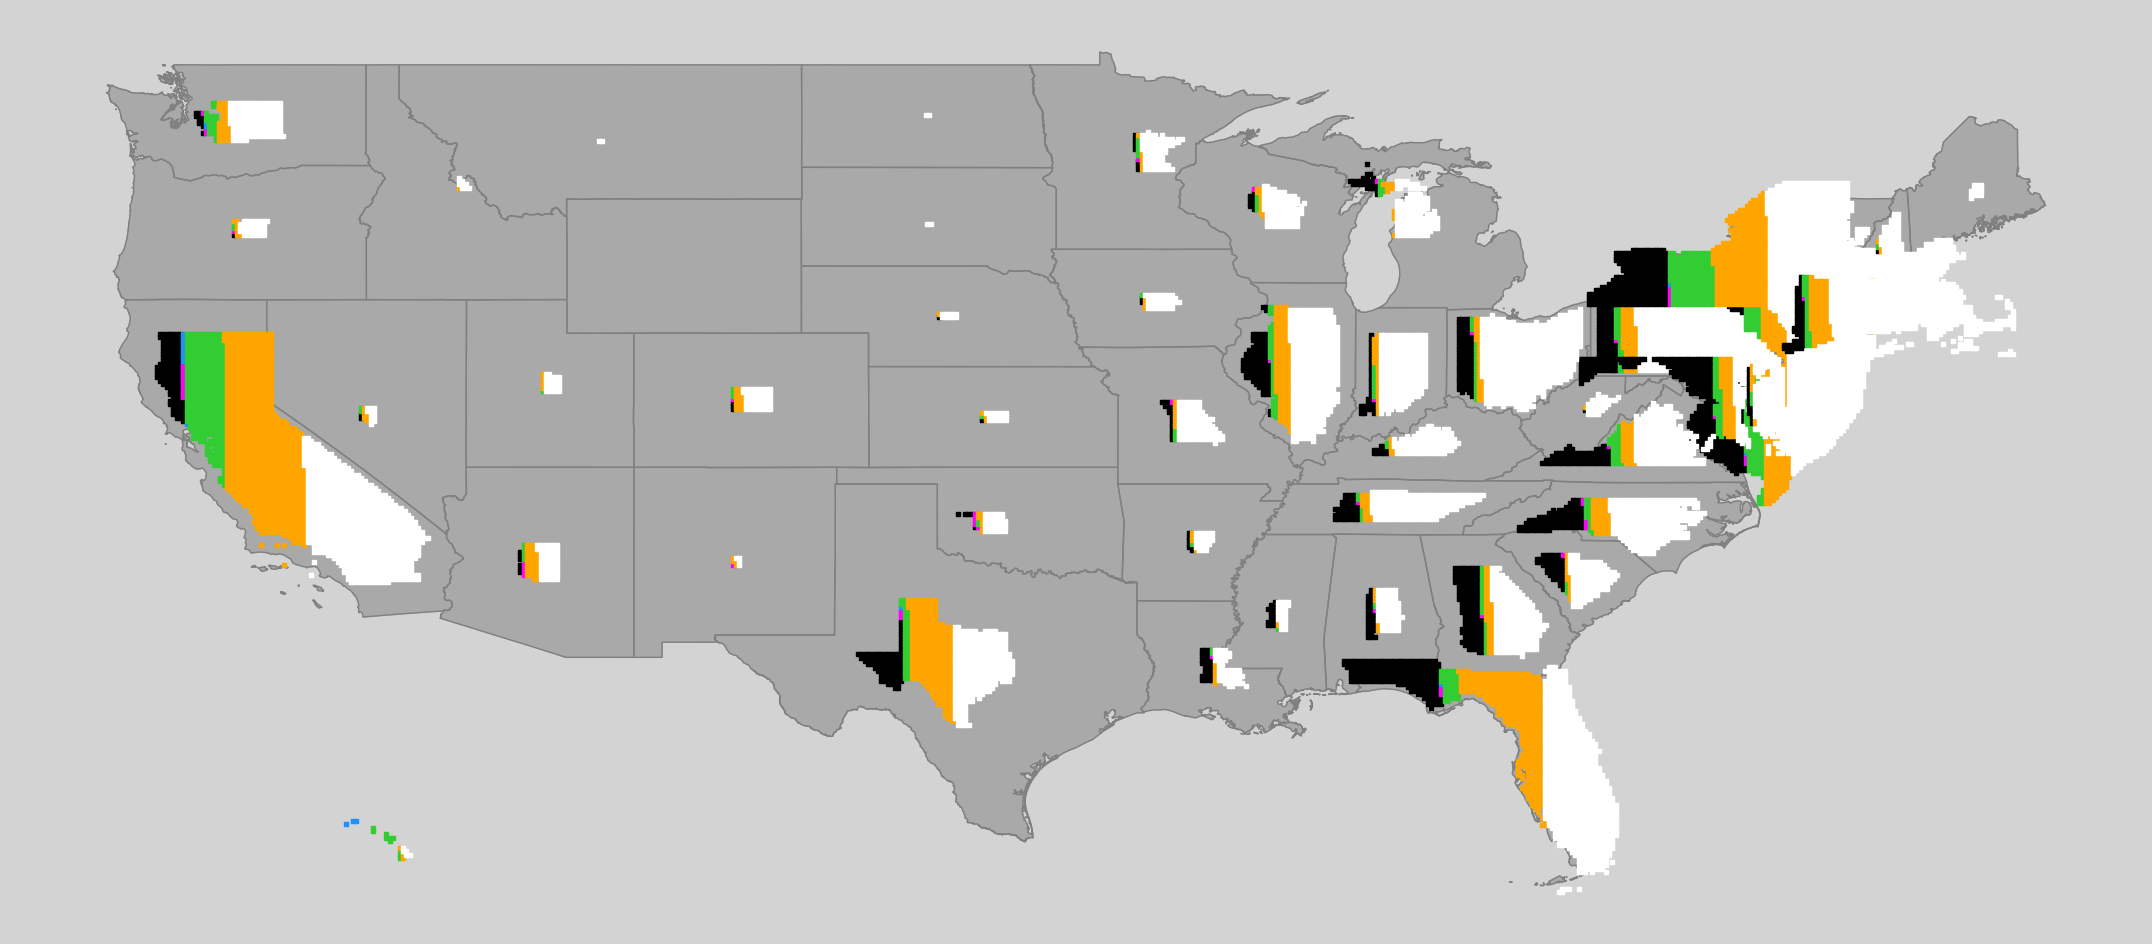

In [80]:
pt_size = 4.7 # point size
marker_type = "s"
lw_states = 1
c_state_fill = "darkgray"
c_state_plot = "gray"
a_state_fill = 1
a_state_plot = 1

plt.figure(figsize=(40,12), facecolor='lightgray')

# plot original single states
for i in range(len(state_coords_s)):
    curr_coords = state_coords_s[i]
    plt.plot(curr_coords[0], curr_coords[1], c=c_state_plot, lw=lw_states, alpha=a_state_plot, zorder=1)
    plt.fill(curr_coords[0], curr_coords[1], c=c_state_fill, alpha=a_state_fill, zorder=0)
    plt.gca().set_aspect("equal")\

# plot original multipolygon states
for i in range(len(state_coords_m)):

    if state_names_m[i]=="Alaska":
        continue
    if state_names_m[i]=="Hawaii":
        continue
    
    curr_coords = state_coords_m[i]
    for j in range(len(curr_coords)):
        plt.plot(curr_coords[j][0], curr_coords[j][1], c=c_state_plot, lw=lw_states, alpha=a_state_plot, zorder=1)
        plt.fill(curr_coords[j][0], curr_coords[j][1], c=c_state_fill, alpha=a_state_fill, zorder=0)
        plt.gca().set_aspect("equal")

# plot scaled points for single polygon states
for i in range(len(new_points_s)):
    print(new_name_s[i])
    curr_pts = new_points_s[i]
    curr_col = new_color_s[i]
    for j in range(len(curr_pts[0])):
        plt.scatter(curr_pts[0][j], curr_pts[1][j], c=curr_col[j], s=pt_size, marker=marker_type)

# plot scaled points for multi polygon states
for i in range(len(new_points_m)):
    print(new_name_m[i])
    curr_pts = new_points_m[i]
    curr_col = new_color_m[i]
    for j in range(len(curr_pts[0])):
        plt.scatter(curr_pts[0][j], curr_pts[1][j], c=curr_col[j], s=pt_size, marker=marker_type)
        
plt.axis("off")

# Waffle plot of acres

In [94]:
# how many pixels in the map?
pt_num = 0
for i in range(len(new_color_s)):
    pt_num+=len(new_color_s[i])
for i in range(len(new_color_m)):
    pt_num+=len(new_color_m[i])
print(pt_num)

19846


In [95]:
# get dimensions for waffle plot
dim = np.round(np.sqrt(pt_num+70))

x_range = np.arange(0, dim, 1)
y_range = np.arange(0, dim, 1)
grid_x = []
grid_y = []
for m in x_range:
    for n in y_range:
        grid_x.append(m)
        grid_y.append(n)

In [96]:
# read in data again
acres = pd.read_csv("./population_map_race_2020.csv")

# select just united states total
curr_df = acres[acres["state"]=="united_states"]

# get the overall total
curr_df["total"] = curr_df["white"]+curr_df["Latino"]+curr_df["Indigenous"]+curr_df["Asian"]+curr_df["Black"]+curr_df["PacificIslander"]

/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_7403/2461048703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df["total"] = curr_df["white"]+curr_df["Latino"]+curr_df["Indigenous"]+curr_df["Asian"]+curr_df["Black"]+curr_df["PacificIslander"]


In [97]:
# get colors
nBlack = int(np.round(((curr_df["Black"]/curr_df["total"])*pt_num).item()))
nIndigenous = int(np.round(((curr_df["Indigenous"]/curr_df["total"])*pt_num).item()))
nPacific = int(np.round(((curr_df["PacificIslander"]/curr_df["total"])*pt_num).item()))
nAsian = int(np.round(((curr_df["Asian"]/curr_df["total"])*pt_num).item()))
nLatino = int(np.round(((curr_df["Latino"]/curr_df["total"])*pt_num).item()))

colors = []
for i in range(nBlack):
    colors.append("k")
for i in range(nIndigenous):
    colors.append("magenta")
for i in range(nPacific):
    colors.append("dodgerblue")
for i in range(nAsian):
    colors.append("limegreen")
for i in range(nLatino):
    colors.append("orange")
for i in range(pt_num-len(colors)):
    colors.append("white")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


(-7.0, 147.0, -7.0, 147.0)

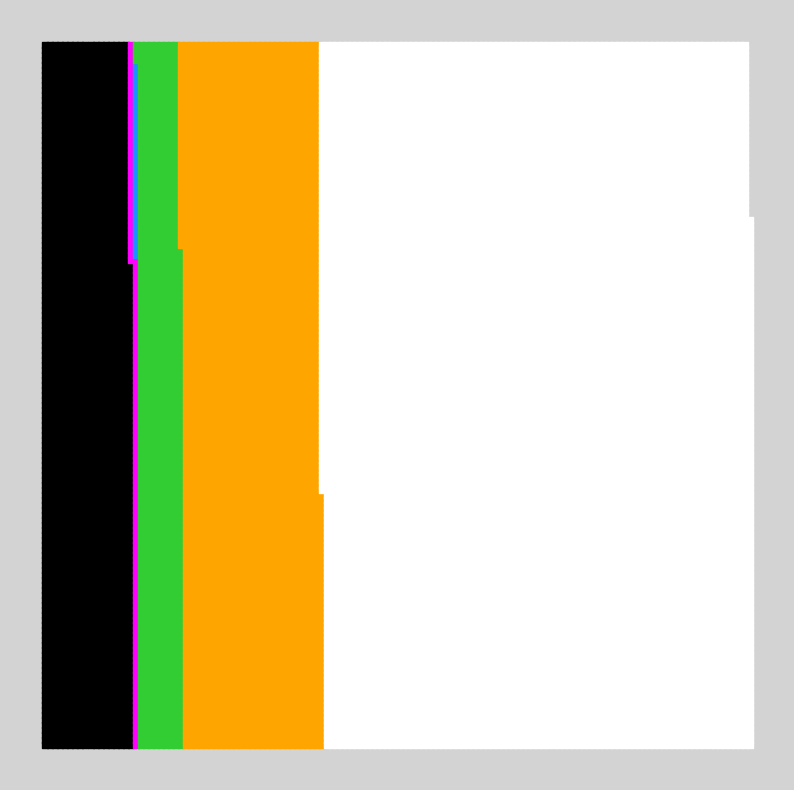

In [121]:
# plot
plt.figure(figsize=(10,10), facecolor="lightgray")
for i in range(len(colors)):
    if i%1000==0:
        print(i)
    plt.scatter(grid_x[i], grid_y[i], c=colors[i], s=13, marker="s")
plt.axis("off")

(-7.0, 147.0, -7.0, 147.0)

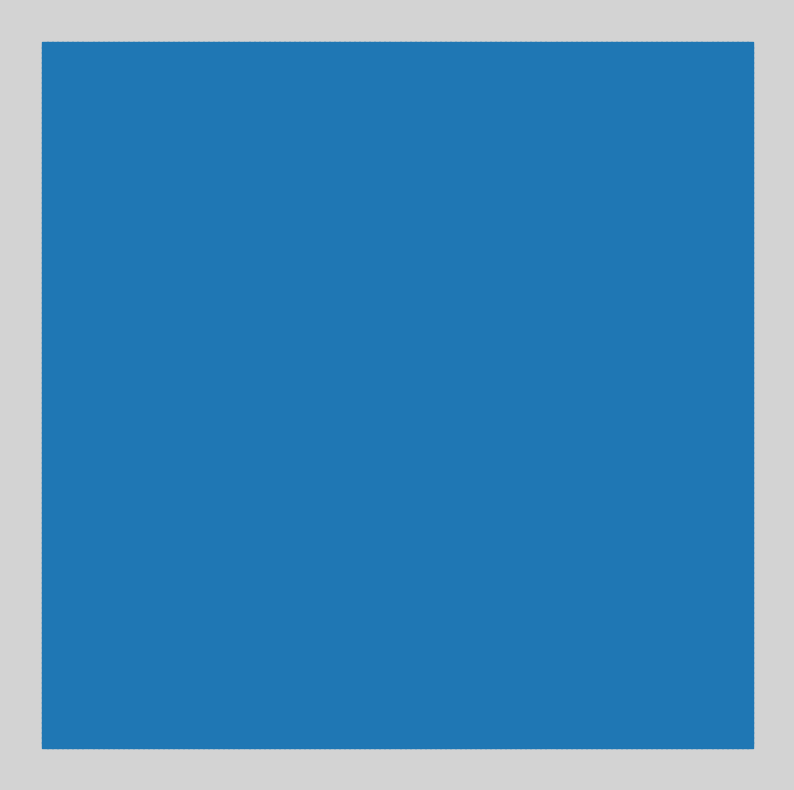

In [120]:
plt.figure(figsize=(10,10), facecolor="lightgray")

plt.scatter(grid_x, grid_y,  s=13, marker="s")

plt.axis("off")